In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Phishing.csv')
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
## check null values
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [4]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [5]:
df.drop('id',axis=1,inplace=True)
df

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,3,1,1,49,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [7]:
df.shape

(10000, 49)

In [8]:
df.duplicated().sum()

419

In [9]:
# finding duplicates
df[df.duplicated(keep=False)]

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
19,1,0,4,59,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,-1,1
34,2,0,5,60,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,-1,1
41,3,1,3,53,1,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
94,1,0,4,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,1,1
95,1,0,4,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,2,1,0,21,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,0,0
5023,2,1,0,21,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,0,0
5031,2,1,0,21,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,0,0
5045,2,1,0,21,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,0,0


In [10]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(9581, 49)

C:\Users\Purushoth\AppData\Local\Temp\ipykernel_7308\1567091332.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


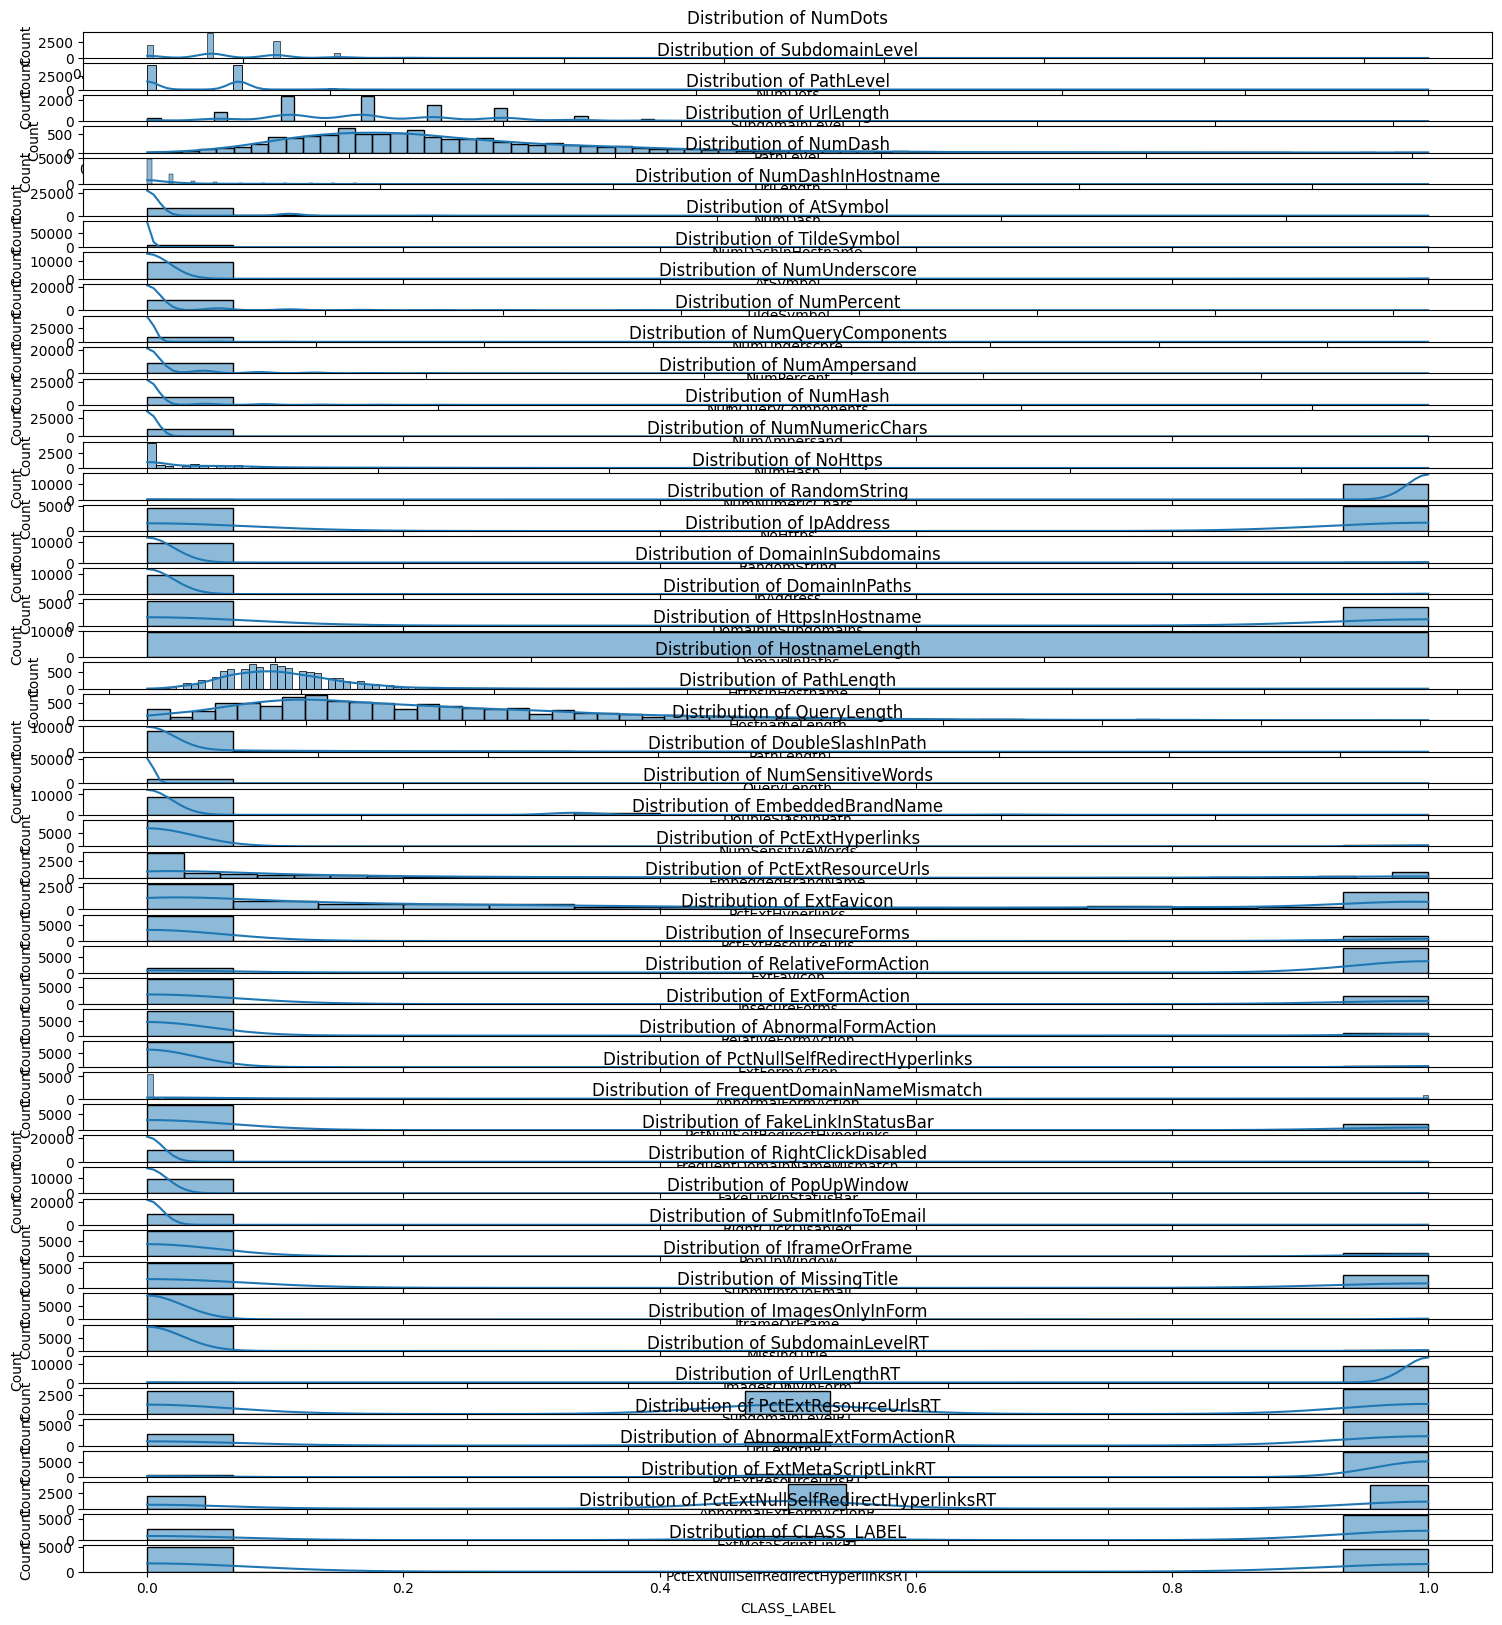

In [11]:
plt.figure(figsize=(40,20))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, start=1):
    plt.subplot(len(df.select_dtypes(include=['float64', 'int64']).columns), 2, i * 2 - 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [12]:
df.shape

(9581, 49)

In [13]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.0 * IQR
    upper_bound = Q3 + 3.0 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Create a Boolean DataFrame indicating outliers
outlier_df = pd.DataFrame()

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    outlier_df[column] = detect_outliers_iqr(df, column)

# Consider rows with outliers in more than one column as problematic
rows_with_multiple_outliers = outlier_df.sum(axis=1) > 1  # Adjust threshold as needed

# Remove rows with outliers in multiple columns
df_cleaned = df[~rows_with_multiple_outliers]

print(df_cleaned)

      NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
2           3               1          2         58        0   
7           1               0          3         30        0   
18          2               0          3         28        0   
21          5               1          2         52        0   
22          2               1          6         62        1   
...       ...             ...        ...        ...      ...   
9992        3               1          2         49        0   
9993        2               1          1         45        3   
9996        2               1          4         59        1   
9997        2               1          4         57        0   
9999        3               1          2         52        3   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
2                     0         0            0              0           0   
7                     0         0            0              0           0   


In [14]:
df_cleaned

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
7,1,0,3,30,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
18,2,0,3,28,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
21,5,1,2,52,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
22,2,1,6,62,1,0,0,0,0,0,...,1,0,0,1,0,1,1,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,3,1,2,49,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,0
9993,2,1,1,45,3,0,0,0,0,0,...,1,0,0,1,1,1,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0


In [15]:
df_cleaned.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
7,1,0,3,30,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
18,2,0,3,28,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
21,5,1,2,52,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
22,2,1,6,62,1,0,0,0,0,0,...,1,0,0,1,0,1,1,0,-1,1


In [16]:
df_cleaned.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [17]:
df_cleaned.corr()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
NumDots,1.000000,0.529605,0.020112,0.078193,-0.226345,0.000731,0.016148,0.032455,0.013718,0.022267,...,-0.120259,0.002725,0.010539,-0.114414,-0.049677,0.039935,NaN,0.036126,-0.082245,0.246866
SubdomainLevel,0.529605,1.000000,-0.026371,0.031195,-0.092669,-0.045016,0.016612,0.030699,0.010929,-0.008195,...,0.041584,0.032827,0.005929,-0.208302,-0.030236,0.030733,NaN,0.069257,0.073402,-0.072114
PathLevel,0.020112,-0.026371,1.000000,0.553152,0.083896,-0.017606,-0.013740,0.027509,0.058866,0.056895,...,-0.037232,-0.018292,-0.022975,0.017912,-0.502208,0.063777,NaN,0.189083,0.045498,0.171547
UrlLength,0.078193,0.031195,0.553152,1.000000,0.655303,-0.015987,0.002532,0.014079,0.116589,0.075048,...,0.123188,-0.062248,0.024331,-0.005669,-0.898823,-0.057750,NaN,0.040978,0.131386,-0.171381
NumDash,-0.226345,-0.092669,0.083896,0.655303,1.000000,0.038416,-0.010720,-0.033947,-0.048864,-0.009021,...,0.255646,-0.046859,-0.006882,-0.000882,-0.595976,-0.156999,NaN,-0.099493,0.172769,-0.470164
NumDashInHostname,0.000731,-0.045016,-0.017606,-0.015987,0.038416,1.000000,-0.003044,-0.009639,-0.023185,-0.009042,...,-0.021325,-0.013305,-0.012204,0.010492,0.021533,0.052145,NaN,0.053085,0.057985,0.047885
AtSymbol,0.016148,0.016612,-0.013740,0.002532,-0.010720,-0.003044,1.000000,-0.001001,-0.002408,-0.000939,...,-0.011564,-0.001382,-0.001267,0.001089,-0.006621,-0.013486,NaN,-0.006817,0.010326,-0.018285
TildeSymbol,0.032455,0.030699,0.027509,0.014079,-0.033947,-0.009639,-0.001001,1.000000,-0.007624,-0.002973,...,-0.036621,-0.004375,-0.004013,0.003450,-0.028260,0.031397,NaN,0.056501,0.018522,0.054737
NumUnderscore,0.013718,0.010929,0.058866,0.116589,-0.048864,-0.023185,-0.002408,-0.007624,1.000000,-0.007152,...,0.028307,-0.010524,-0.009653,0.008299,-0.113082,0.011863,NaN,-0.024137,0.049076,-0.082606
NumPercent,0.022267,-0.008195,0.056895,0.075048,-0.009021,-0.009042,-0.000939,-0.002973,-0.007152,1.000000,...,-0.029731,-0.004104,-0.003764,0.003236,-0.060713,-0.003914,NaN,0.011980,0.009395,0.051347


In [18]:
x = df_cleaned.drop("CLASS_LABEL",axis=1)
y = df_cleaned["CLASS_LABEL"]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape, x_test.shape

((2215, 48), (950, 48))

In [20]:
x_train.corr()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
NumDots,1.000000,0.529877,0.004940,0.075506,-0.221869,-0.004253,0.019535,0.038604,0.013706,0.027518,...,-0.040129,-0.100565,-0.005494,0.011477,-0.115529,-0.055000,0.028440,NaN,0.016174,-0.094994
SubdomainLevel,0.529877,1.000000,-0.042978,0.030072,-0.086447,-0.032928,0.020159,0.042494,0.010960,-0.006918,...,0.048071,0.052794,0.011571,0.004021,-0.208576,-0.041200,0.031369,NaN,0.059484,0.068382
PathLevel,0.004940,-0.042978,1.000000,0.561326,0.103215,-0.018856,-0.016373,0.029554,0.067382,0.066482,...,0.000788,-0.042220,-0.015907,-0.017097,0.030316,-0.498288,0.064458,NaN,0.188706,0.048668
UrlLength,0.075506,0.030072,0.561326,1.000000,0.660571,-0.015496,0.003121,0.013765,0.133332,0.085224,...,0.056370,0.131964,-0.053043,0.014322,-0.006227,-0.900497,-0.053986,NaN,0.036259,0.126117
NumDash,-0.221869,-0.086447,0.103215,0.660571,1.000000,0.040310,-0.012879,-0.036484,-0.045104,-0.006852,...,0.109721,0.259622,-0.040809,-0.023486,-0.003283,-0.608096,-0.144270,NaN,-0.094002,0.166763
NumDashInHostname,-0.004253,-0.032928,-0.018856,-0.015496,0.040310,1.000000,-0.003584,-0.010153,-0.023149,-0.008117,...,-0.035106,-0.017999,-0.011357,-0.012958,0.009592,0.030441,0.050511,NaN,0.035456,0.059489
AtSymbol,0.019535,0.020159,-0.016373,0.003121,-0.012879,-0.003584,1.000000,-0.001280,-0.002917,-0.001023,...,-0.004424,-0.013756,-0.001431,-0.001633,0.001209,-0.007856,-0.016236,NaN,-0.008017,0.012286
TildeSymbol,0.038604,0.042494,0.029554,0.013765,-0.036484,-0.010153,-0.001280,1.000000,-0.008264,-0.002898,...,-0.012533,-0.038970,-0.004055,-0.004626,0.003424,-0.032006,0.033226,NaN,0.060580,0.015760
NumUnderscore,0.013706,0.010960,0.067382,0.133332,-0.045104,-0.023149,-0.002917,-0.008264,1.000000,-0.006607,...,-0.028575,0.012117,-0.009244,-0.010547,0.007808,-0.126791,0.006834,NaN,-0.016802,0.046215
NumPercent,0.027518,-0.006918,0.066482,0.085224,-0.006852,-0.008117,-0.001023,-0.002898,-0.006607,1.000000,...,-0.010020,-0.031156,-0.003242,-0.003698,0.002738,-0.064563,-0.013021,NaN,0.006813,-0.002626


In [21]:
x_train.isna().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [22]:
x_train.head(20)

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
2629,4,1,4,49,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
8277,1,0,2,29,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,1
4923,3,1,5,71,2,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
3134,2,1,2,34,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
919,2,0,2,34,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
3684,2,1,2,33,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
9324,2,1,5,50,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1
2248,3,1,4,58,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
7004,2,1,3,83,7,0,0,0,0,0,...,0,1,0,0,1,-1,1,1,0,0
1894,2,0,2,39,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,-1,-1


In [23]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold to remove features with zero variance
selector = VarianceThreshold(threshold=0)  # threshold=0 removes all zero-variance features

# Apply to your training data
x_train_reduced = selector.fit_transform(x_train)
x_test_reduced = selector.transform(x_test)

In [24]:
x_train_reduced.shape

(2215, 40)

In [25]:
x_test_reduced.shape

(950, 40)

In [26]:
x_train

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
2629,4,1,4,49,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
8277,1,0,2,29,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,1
4923,3,1,5,71,2,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
3134,2,1,2,34,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
919,2,0,2,34,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9826,2,1,2,46,1,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1
3390,2,1,5,65,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
3504,2,1,3,49,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
3978,2,0,2,46,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,1,-1,-1


In [27]:
x_test

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
8646,1,0,3,50,0,0,0,0,2,0,...,0,0,0,0,1,1,1,1,0,1
939,2,0,4,47,2,1,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
458,2,0,4,52,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
966,2,1,2,46,1,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
4814,4,1,3,43,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8330,2,0,2,42,2,1,0,0,0,0,...,0,0,0,0,1,1,1,1,0,1
3508,2,1,2,33,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
6297,1,0,3,74,5,0,0,0,0,0,...,0,0,0,0,1,0,1,1,-1,1
481,3,1,5,81,1,0,0,0,0,0,...,0,0,0,0,1,-1,1,1,-1,-1


In [28]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold to remove features with zero variance
selector = VarianceThreshold(threshold=0)  # threshold=0 removes all zero-variance features

# Apply to your training data
x_train_reduced = selector.fit_transform(x_train)
selected_columns = x_train.columns[selector.get_support()]
x_train_reduced_df = pd.DataFrame(x_train_reduced, columns=selected_columns)
x_test_reduced = selector.transform(x_test)
x_test_reduced_df = pd.DataFrame(x_test_reduced, columns=selected_columns)

In [29]:
x_train_reduced_df

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,4.0,1.0,4.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,3.0,1.0,5.0,71.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,2.0,1.0,2.0,34.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,2.0,0.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,2.0,1.0,2.0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2211,2.0,1.0,5.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2212,2.0,1.0,3.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2213,2.0,0.0,2.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.0,-1.0,-1.0


In [30]:
x_test_reduced_df

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,1.0,0.0,3.0,50.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,2.0,0.0,4.0,47.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,2.0,0.0,4.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,2.0,1.0,2.0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,4.0,1.0,3.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,2.0,0.0,2.0,42.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
946,2.0,1.0,2.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
947,1.0,0.0,3.0,74.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,1.0
948,3.0,1.0,5.0,81.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,-1.0,-1.0


In [31]:
x_train_reduced_df.corr()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
NumDots,1.000000,0.529877,0.004940,0.075506,-0.221869,-0.004253,0.019535,0.038604,0.013706,0.027518,...,-0.004097,-0.040129,-0.100565,-0.005494,0.011477,-0.115529,-0.055000,0.028440,0.016174,-0.094994
SubdomainLevel,0.529877,1.000000,-0.042978,0.030072,-0.086447,-0.032928,0.020159,0.042494,0.010960,-0.006918,...,0.020159,0.048071,0.052794,0.011571,0.004021,-0.208576,-0.041200,0.031369,0.059484,0.068382
PathLevel,0.004940,-0.042978,1.000000,0.561326,0.103215,-0.018856,-0.016373,0.029554,0.067382,0.066482,...,-0.028987,0.000788,-0.042220,-0.015907,-0.017097,0.030316,-0.498288,0.064458,0.188706,0.048668
UrlLength,0.075506,0.030072,0.561326,1.000000,0.660571,-0.015496,0.003121,0.013765,0.133332,0.085224,...,-0.018726,0.056370,0.131964,-0.053043,0.014322,-0.006227,-0.900497,-0.053986,0.036259,0.126117
NumDash,-0.221869,-0.086447,0.103215,0.660571,1.000000,0.040310,-0.012879,-0.036484,-0.045104,-0.006852,...,-0.004581,0.109721,0.259622,-0.040809,-0.023486,-0.003283,-0.608096,-0.144270,-0.094002,0.166763
NumDashInHostname,-0.004253,-0.032928,-0.018856,-0.015496,0.040310,1.000000,-0.003584,-0.010153,-0.023149,-0.008117,...,-0.003584,-0.035106,-0.017999,-0.011357,-0.012958,0.009592,0.030441,0.050511,0.035456,0.059489
AtSymbol,0.019535,0.020159,-0.016373,0.003121,-0.012879,-0.003584,1.000000,-0.001280,-0.002917,-0.001023,...,-0.000452,-0.004424,-0.013756,-0.001431,-0.001633,0.001209,-0.007856,-0.016236,-0.008017,0.012286
TildeSymbol,0.038604,0.042494,0.029554,0.013765,-0.036484,-0.010153,-0.001280,1.000000,-0.008264,-0.002898,...,-0.001280,-0.012533,-0.038970,-0.004055,-0.004626,0.003424,-0.032006,0.033226,0.060580,0.015760
NumUnderscore,0.013706,0.010960,0.067382,0.133332,-0.045104,-0.023149,-0.002917,-0.008264,1.000000,-0.006607,...,-0.002917,-0.028575,0.012117,-0.009244,-0.010547,0.007808,-0.126791,0.006834,-0.016802,0.046215
NumPercent,0.027518,-0.006918,0.066482,0.085224,-0.006852,-0.008117,-0.001023,-0.002898,-0.006607,1.000000,...,-0.001023,-0.010020,-0.031156,-0.003242,-0.003698,0.002738,-0.064563,-0.013021,0.006813,-0.002626


In [32]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(x_train_reduced_df)
# X_test_scaled = scaler.transform(x_test_reduced_df)
# x_train_scaled_df = pd.DataFrame(X_train_scaled,columns=x_train_reduced_df.columns)
# x_test_scaled_df = pd.DataFrame(X_test_scaled,columns=x_test_reduced_df.columns)

In [33]:
x_train_reduced_df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,4.0,1.0,4.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,3.0,1.0,5.0,71.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,2.0,1.0,2.0,34.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,2.0,0.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [34]:
x_test_reduced_df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,1.0,0.0,3.0,50.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,2.0,0.0,4.0,47.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,2.0,0.0,4.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,2.0,1.0,2.0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,4.0,1.0,3.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,-1.0


In [35]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # You can use any classifier

# Variables to store the best k and its score
best_k = None
best_score = -1  # Initialize with a low score

# Define the pipeline with SelectKBest and a classifier
for k in range(5, 20):  # Try different values for k
    pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
        ('classifier', RandomForestClassifier())
    ])
    scores = cross_val_score(pipeline, x_train_reduced_df, y_train, cv=5)  # 5-fold cross-validation
    mean_score = scores.mean()
    
    print(f"k={k}, mean accuracy={mean_score:.4f}")
    
    # Check if the current mean score is the best
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

# Print the best k and its score
print(f"\nBest k: {best_k}, with a mean accuracy of: {best_score:.4f}")

e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=5, mean accuracy=0.8709


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=6, mean accuracy=0.9336


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=7, mean accuracy=0.9598


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=8, mean accuracy=0.9594


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=9, mean accuracy=0.9625


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=10, mean accuracy=0.9603


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=11, mean accuracy=0.9621


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=12, mean accuracy=0.9625


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=13, mean accuracy=0.9634


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=14, mean accuracy=0.9698


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=15, mean accuracy=0.9688


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=16, mean accuracy=0.9707


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=17, mean accuracy=0.9729


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=18, mean accuracy=0.9743


e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 6 13 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\endtoendproject\Phishing_detection\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [30] 

k=19, mean accuracy=0.9779

Best k: 19, with a mean accuracy of: 0.9779


In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection based on the ANOVA F-test for classification
selector = SelectKBest(score_func=f_classif, k=19)
original_columns = x_train_reduced_df.columns
X_train_selected = selector.fit_transform(x_train_reduced_df, y_train)
X_test_selected = selector.transform(x_test_reduced_df)

In [37]:
X_train_selected

array([[ 4.,  4., 49., ...,  1.,  1.,  1.],
       [ 1.,  2., 29., ...,  1.,  0.,  1.],
       [ 3.,  5., 71., ...,  1.,  1.,  1.],
       ...,
       [ 2.,  3., 49., ...,  1.,  1.,  1.],
       [ 2.,  2., 46., ..., -1., -1., -1.],
       [ 2.,  4., 58., ..., -1., -1., -1.]])

In [38]:
X_test_selected

array([[ 1.,  3., 50., ...,  1.,  0.,  1.],
       [ 2.,  4., 47., ...,  1.,  1.,  1.],
       [ 2.,  4., 52., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  3., 74., ...,  1., -1.,  1.],
       [ 3.,  5., 81., ...,  1., -1., -1.],
       [ 4.,  4., 70., ...,  1.,  1.,  1.]])

In [39]:
original_columns = x_train_reduced_df.columns
selected_columns_mask = selector.get_support()
selected_columns = original_columns[selected_columns_mask]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_columns)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_columns)

In [40]:
X_train_selected_df.shape

(2215, 19)

In [41]:
X_test_selected_df.shape

(950, 19)

In [42]:
X_train_selected_df

,NumDots,PathLevel,UrlLength,NumDash,NumNumericChars,RandomString,DomainInPaths,PathLength,PctExtHyperlinks,InsecureForms,RelativeFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,UrlLengthRT,PctExtResourceUrlsRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,4.0,4.0,49.0,0.0,0.0,1.0,0.0,27.0,0.000000,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,1.0,2.0,29.0,0.0,1.0,0.0,0.0,16.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,3.0,5.0,71.0,2.0,0.0,0.0,0.0,47.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,2.0,2.0,34.0,1.0,0.0,1.0,0.0,12.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,2.0,2.0,34.0,0.0,0.0,0.0,1.0,14.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,2.0,2.0,46.0,1.0,0.0,0.0,0.0,23.0,0.055556,1.0,0.0,0.055556,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2211,2.0,5.0,65.0,0.0,4.0,0.0,0.0,41.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2212,2.0,3.0,49.0,0.0,0.0,0.0,0.0,19.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2213,2.0,2.0,46.0,0.0,0.0,1.0,0.0,19.0,1.000000,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,-1.0,-1.0,-1.0


In [43]:
y_train

2629    1
8277    0
4923    1
3134    1
919     1
       ..
9826    0
3390    1
3504    1
3978    1
2710    1
Name: CLASS_LABEL, Length: 2215, dtype: int64

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected_df)
X_test_scaled = scaler.transform(X_test_selected_df)
x_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train_selected_df.columns)
x_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test_selected_df.columns)

In [45]:
x_train_scaled_df

,NumDots,PathLevel,UrlLength,NumDash,NumNumericChars,RandomString,DomainInPaths,PathLength,PctExtHyperlinks,InsecureForms,RelativeFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,UrlLengthRT,PctExtResourceUrlsRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,2.031137,0.416687,-0.413841,-0.605983,-0.584107,0.988776,-0.797429,-0.272303,-0.654050,0.348596,3.501924,-0.298613,-0.370221,-0.20817,-0.647273,0.925893,0.551863,1.006204,0.578074
1,-1.304727,-0.770402,-1.348349,-0.605983,-0.399464,-1.011351,-0.797429,-0.799406,-0.654050,-2.868652,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,0.925893,0.551863,-0.377249,0.578074
2,0.919182,1.010232,0.614117,0.174850,-0.584107,-1.011351,-0.797429,0.686068,-0.654050,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,-0.369655,0.551863,1.006204,0.578074
3,-0.192772,-0.770402,-1.114722,-0.215566,-0.584107,0.988776,-0.797429,-0.991080,-0.654050,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,0.925893,0.551863,1.006204,0.578074
4,-0.192772,-0.770402,-1.114722,-0.605983,-0.584107,-1.011351,1.254030,-0.895243,-0.654050,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,0.925893,0.551863,1.006204,0.578074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,-0.192772,-0.770402,-0.554017,-0.215566,-0.584107,-1.011351,-0.797429,-0.463977,-0.486417,0.348596,-0.285557,0.021178,-0.370221,-0.20817,1.544943,0.925893,-0.763936,-0.377249,0.578074
2211,-0.192772,1.010232,0.333765,-0.605983,0.154467,-1.011351,-0.797429,0.398557,-0.654050,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,-0.369655,0.551863,1.006204,0.578074
2212,-0.192772,-0.176858,-0.413841,-0.605983,-0.584107,-1.011351,-0.797429,-0.655651,-0.654050,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,0.925893,0.551863,1.006204,0.578074
2213,-0.192772,-0.770402,-0.554017,-0.605983,-0.584107,0.988776,-0.797429,-0.655651,2.363337,0.348596,-0.285557,-0.298613,2.701089,-0.20817,1.544943,0.925893,-2.079735,-1.760701,-1.952427


In [46]:
x_test_scaled_df

,NumDots,PathLevel,UrlLength,NumDash,NumNumericChars,RandomString,DomainInPaths,PathLength,PctExtHyperlinks,InsecureForms,RelativeFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,UrlLengthRT,PctExtResourceUrlsRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,-1.304727,-0.176858,-0.367116,-0.605983,-0.214820,0.988776,1.254030,0.015208,-0.50318,0.348596,-0.285557,-0.010802,-0.370221,-0.20817,-0.647273,0.925893,0.551863,-0.377249,0.578074
1,-0.192772,0.416687,-0.507292,0.174850,-0.584107,-1.011351,-0.797429,-0.320221,-0.65405,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,0.925893,0.551863,1.006204,0.578074
2,-0.192772,0.416687,-0.273665,-0.605983,-0.584107,-1.011351,-0.797429,-0.176466,-0.65405,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,0.925893,0.551863,1.006204,0.578074
3,-0.192772,-0.770402,-0.554017,-0.215566,-0.584107,-1.011351,-0.797429,-0.943162,-0.65405,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,0.925893,0.551863,1.006204,0.578074
4,2.031137,-0.176858,-0.694193,-0.605983,-0.584107,-1.011351,-0.797429,-0.895243,2.13123,0.348596,-0.285557,-0.298613,2.701089,-0.20817,-0.647273,0.925893,0.551863,-1.760701,-1.952427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,-0.192772,-0.770402,-0.740919,0.174850,0.339111,0.988776,-0.797429,-0.703569,-0.65405,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,0.925893,0.551863,-0.377249,0.578074
946,-0.192772,-0.770402,-1.161447,-0.605983,-0.584107,-1.011351,-0.797429,-1.182754,-0.65405,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,0.925893,0.551863,1.006204,0.578074
947,-1.304727,-0.176858,0.754293,1.346100,0.339111,0.988776,1.254030,1.117334,-0.65405,0.348596,-0.285557,-0.298613,-0.370221,-0.20817,-0.647273,-0.369655,0.551863,-1.760701,0.578074
948,0.919182,1.010232,1.081371,-0.215566,-0.584107,0.988776,-0.797429,0.925660,2.13123,0.348596,-0.285557,-0.298613,2.701089,-0.20817,-0.647273,-1.665204,0.551863,-1.760701,-1.952427


^C


  Using cached tensorflow-2.17.0-cp310-cp310-win_amd64.whl (2.0 kB)
     -------------------------------------- 385.0/385.0 MB 2.0 MB/s eta 0:00:00
  Using cached ml_dtypes-0.4.0-cp310-cp310-win_amd64.whl (126 kB)
  Using cached protobuf-4.25.4-cp310-abi3-win_amd64.whl (413 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached h5py-3.11.0-cp310-cp310-win_amd64.whl (3.0 MB)
  Using cached grpcio-1.66.1-cp310-cp310-win_amd64.whl (4.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.17.1-p

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.0.0 requires numpy<1.24,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
scipy 1.9.3 requires numpy<1.26.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 385.0/385.0 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 M

In [47]:
x_train_scaled_df.shape

(2215, 19)

In [48]:
y_train.shape

(2215,)

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=19, activation='relu'))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary classification)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train_scaled_df,y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test_scaled_df,y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')


Epoch 1/10
56/56 [==============================] - 1s 6ms/step - loss: 0.5035 - accuracy: 0.7935 - val_loss: 0.3569 - val_accuracy: 0.8781
Epoch 2/10
56/56 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8979 - val_loss: 0.2408 - val_accuracy: 0.9029
Epoch 3/10
56/56 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9148 - val_loss: 0.2189 - val_accuracy: 0.9097
Epoch 4/10
56/56 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9199 - val_loss: 0.1942 - val_accuracy: 0.9233
Epoch 5/10
56/56 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9266 - val_loss: 0.1783 - val_accuracy: 0.9368
Epoch 6/10
56/56 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.9345 - val_loss: 0.1685 - val_accuracy: 0.9413
Epoch 7/10
56/56 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9419 - val_loss: 0.1583 - val_accuracy: 0.9413
Epoch 8/10
56/56 [==

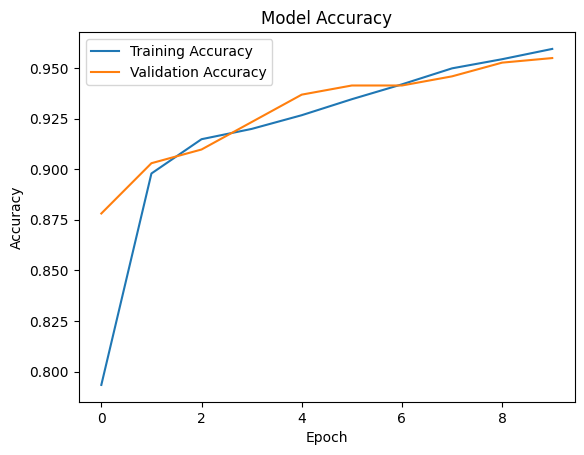

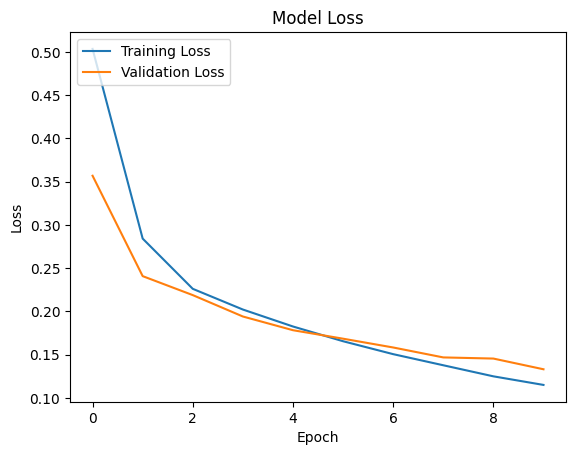

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [51]:
# Overfitting: If you notice that:

# The training loss continues to decrease, but the validation loss increases after some epochs.
# The training accuracy improves, but the validation accuracy plateaus or worsens.
# This indicates that the model is overfitting, learning patterns specific to the training data that do not generalize to unseen data.

# Good Fit: The training and validation loss/accuracy should both improve steadily and stay close to each other.

In [52]:
# Predict the output for the test data
y_pred = model.predict(x_test_scaled_df)

# If you need binary classification, convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Display predictions
print(y_pred_classes[0:10])

30/30 [==============================] - 0s 1ms/step
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [53]:
y_test.head(10)

8646    0
939     1
458     1
966     1
4814    1
2319    1
1099    1
8884    0
1642    1
3164    1
Name: CLASS_LABEL, dtype: int64

In [54]:
### thus the phishing detection is done.. with the value of Loss: 0.1151, Accuracy: 0.9589